# COSC 3337: Data Science I
# Homework 1 (Regression)

# Dr. Rizk

### [100 points]


_About The Data_

The data we'll be using comes from kaggle, and contains the following car attributes:

    car_ID
    symboling
    CarName
    fueltype
    aspiration
    doornumber
    carbody
    drivewheel
    enginelocation
    wheelbase
    carlength
    carwidth
    carheight
    curbweight
    enginetype
    cylindernumber
    enginesize
    fuelsystem
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    citympg
    highwaympg
    price

## Problem Statement

You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the following:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car



## Part 1: Reading and Understanding the Data

### [8 points]

Begin by importing some necessary libraries that you'll be using to explore the data.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [46]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

1.1 Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

[3 Points]

In [47]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df = pd.read_csv("car_data.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1.2 Print some basic statistics of your data.

[3 Points]

In [48]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1.3 Print some general information about your data using pandas.

[2 Points]

In [49]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

### TYPE YOUR ANSWER HERE
There is no missing values because the DataFrame has 205 entries and every column shows 205 non-null which means that every row has a value in every column.

## Part 2: Data Cleaning and Preparation

### [7 Points]

2.1 Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

[3 Points]

In [50]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
car_company = cars_df["CarName"]
car_company = car_company.str.lower()
car_company = car_company.str.split().str[0]
unique_companies = car_company.unique()
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


2.2 Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again.

[4 Points]

In [51]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df["CarName"] = cars_df["CarName"].str.replace('maxda', 'mazda')
cars_df["CarName"] = cars_df["CarName"].str.replace('porcshce', 'porsche')
cars_df["CarName"] = cars_df["CarName"].str.replace('toyouta', 'toyota')
cars_df["CarName"] = cars_df["CarName"].str.replace('vokswagen', 'volkswagen')
cars_df["CarName"] = cars_df["CarName"].str.replace('vw', 'volkswagen')
car_company = cars_df["CarName"]
car_company = car_company.str.lower()
car_company = car_company.str.split().str[0]
unique_companies = car_company.unique()
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3: Visualising Categorical Data

### [50 points]


    CompanyName
    Symboling
    fueltype
    enginetype
    carbody
    doornumber
    enginelocation
    fuelsystem
    cylindernumber
    aspiration
    drivewheel

3.1 Create the following plots

    1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
    2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

[4 Points]

Text(0.5, 1.0, 'Car Body Count')

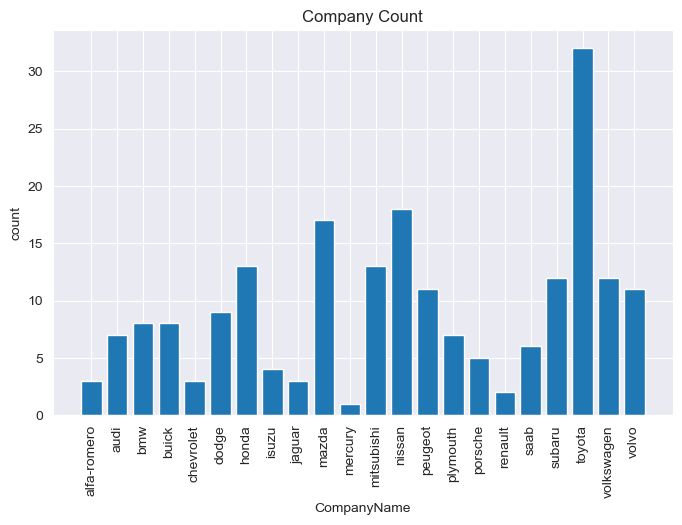

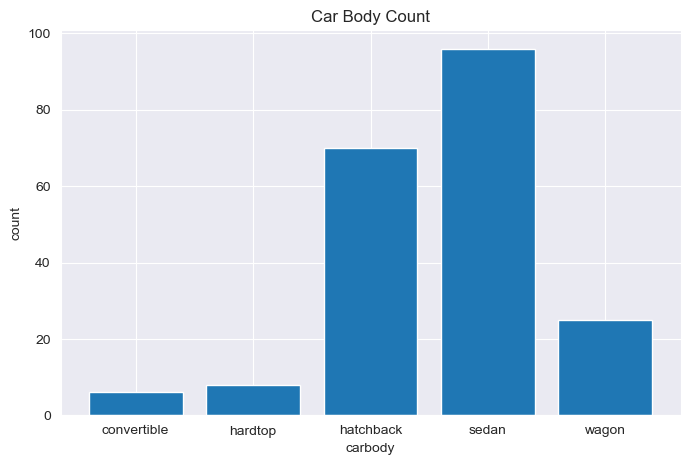

In [52]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
values, counts = np.unique(car_company, return_counts=True)
plt.bar(values, counts)
plt.xticks(rotation=90)
plt.xlabel("CompanyName")
plt.ylabel("count")
plt.title("Company Count")
carBody = cars_df["carbody"]
values1, counts1 = np.unique(carBody, return_counts=True)
plt.figure()
plt.bar(values1, counts1)
plt.xlabel("carbody")
plt.ylabel("count")
plt.title("Car Body Count")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
The brand that people buy most are from companies that make economy cars. Hatchback and sedans seem to be the most popular car body style

3.2 Create the following plots

    1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
    2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

[4 Points]

Text(0.5, 1.0, 'Car Body vs. Average Price')

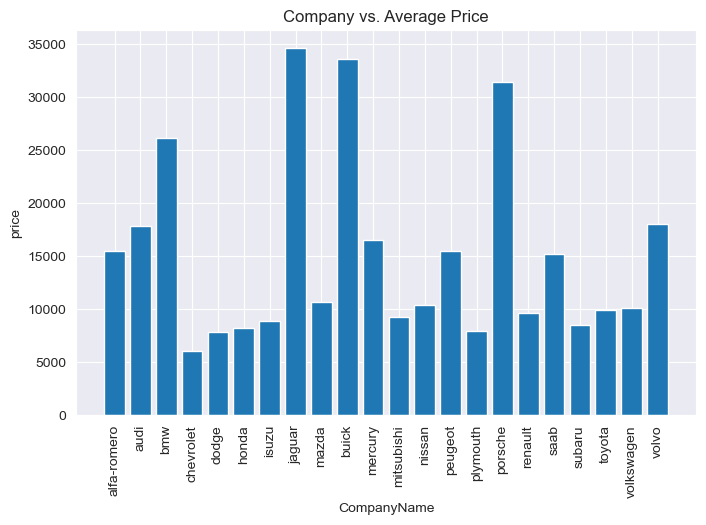

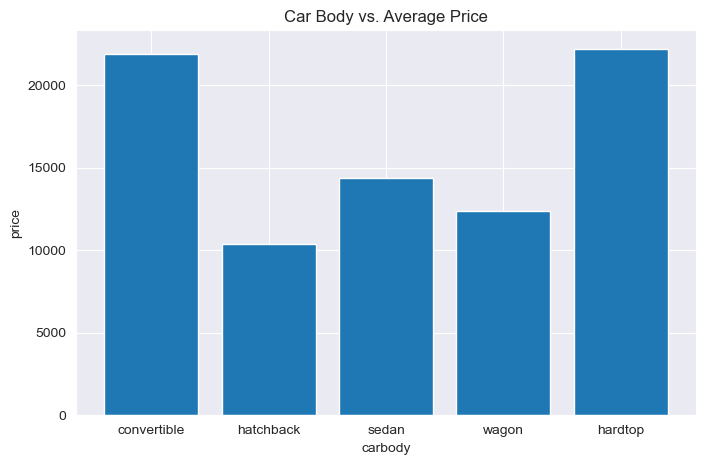

In [53]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
price = cars_df["price"]
averages = []
for i in unique_companies:
    avg = price[car_company == i].mean()
    averages.append(avg)
averages = np.array(averages)
plt.bar(unique_companies, averages)
plt.xticks(rotation=90)
plt.xlabel("CompanyName")
plt.ylabel("price")
plt.title("Company vs. Average Price")
averages1 = []
uniqueCarBody = carBody.unique()
for j in uniqueCarBody:
    avg1 = price[carBody == j].mean()
    averages1.append(avg1)
averages1 = np.array(averages1)
plt.figure()
plt.bar(uniqueCarBody, averages1)
plt.xlabel("carbody")
plt.ylabel("price")
plt.title("Car Body vs. Average Price")


After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Companies that make luxury cars tend to be more expensive than companies that make economic cars. Convertible and hardtop seem to be the most expensive out of all the car bodies

3.3 Create the following plots

    1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
    2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

[4 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\620845392.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result, labels=uniqueSymboling)


Text(0.5, 1.0, 'Symboling vs Price')

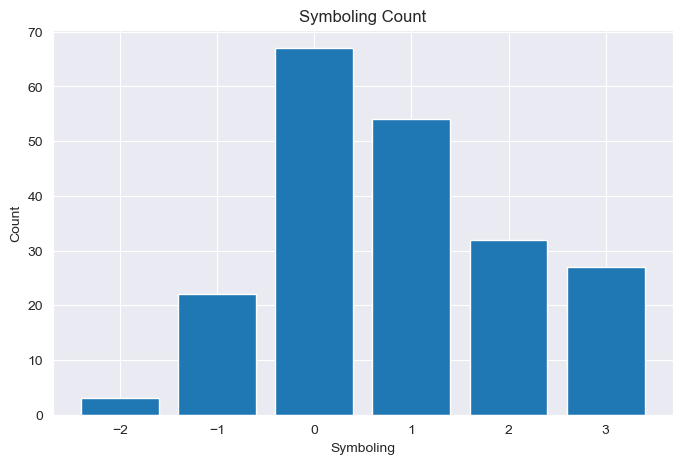

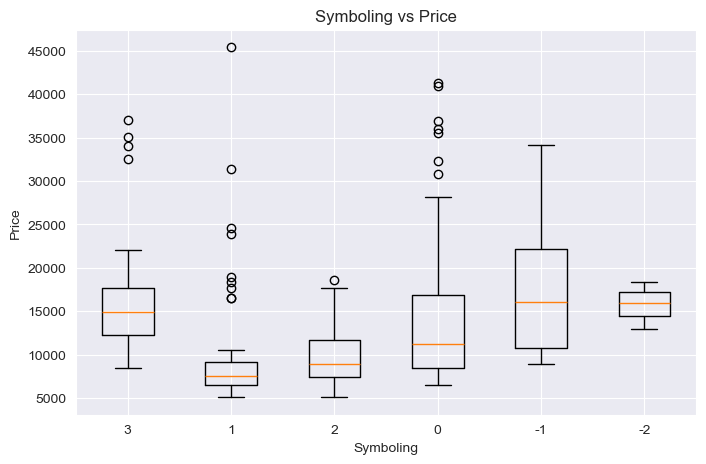

In [54]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
symboling = cars_df["symboling"]
values2, counts2 = np.unique(symboling, return_counts=True)
plt.bar(values2, counts2)
plt.xlabel("Symboling")
plt.ylabel("Count")
plt.title("Symboling Count")
uniqueSymboling = symboling.unique()
result = []
for k in uniqueSymboling:
    value = price[symboling == k]
    result.append(value)
plt.figure()
plt.boxplot(result, labels=uniqueSymboling)
plt.xlabel("Symboling")
plt.ylabel("Price")
plt.title("Symboling vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Most cars seem to have an average risk. It seems that higher risk cars seem to be more expensive.

3.4 Create the following plots

    1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginetype on the x-axis and price on the y-axis.

[4 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\4156031928.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result1, labels=uniqueEngineType)


Text(0.5, 1.0, 'Engine Type vs Price')

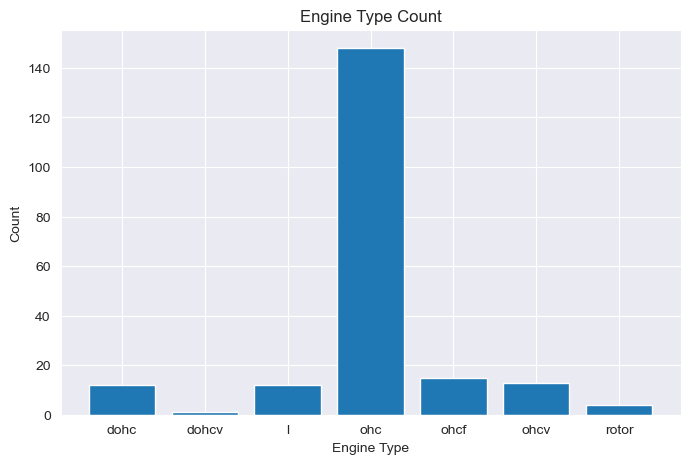

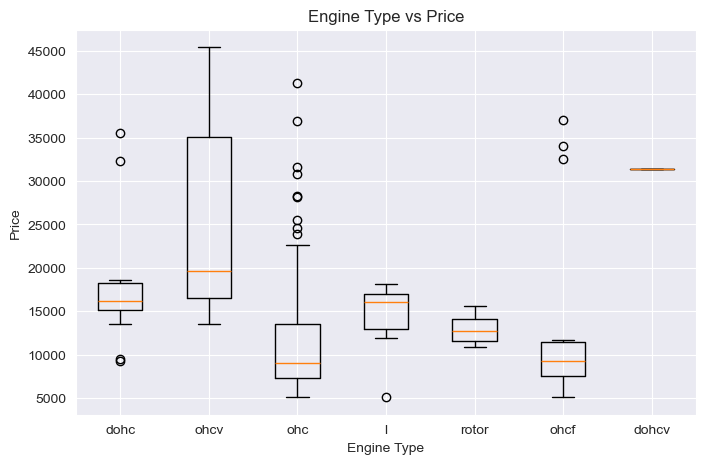

In [55]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
engineType = cars_df["enginetype"]
values3, counts3 = np.unique(engineType, return_counts=True)
plt.bar(values3, counts3)
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.title("Engine Type Count")
uniqueEngineType = engineType.unique()
result1 = []
for x in uniqueEngineType:
    value1 = price[engineType == x]
    result1.append(value1)
plt.figure()
plt.boxplot(result1, labels=uniqueEngineType)
plt.xlabel("Engine Type")
plt.ylabel("Price")
plt.title("Engine Type vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
The ohc engine takes an overwhelming marketshare. The ohcv engine seems to be the most varied in price.

3.5 Create the following plots

    1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of cylindernumber on the x-axis and price on the y-axis.

[4 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\3616475265.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result2, labels=uniqueCylinderNumber)


Text(0.5, 1.0, 'Cylinder Number vs Price')

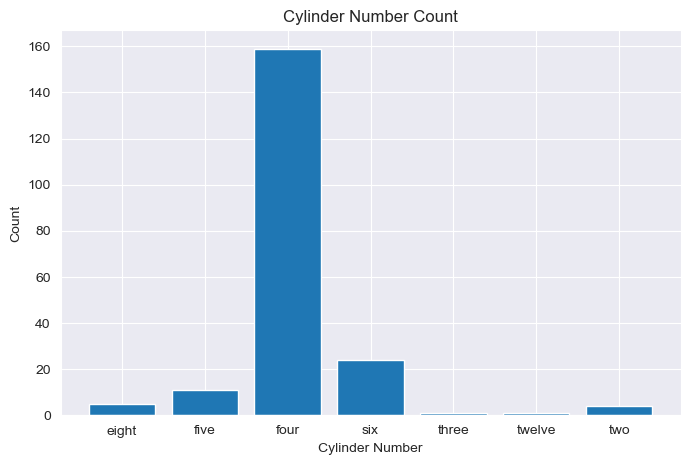

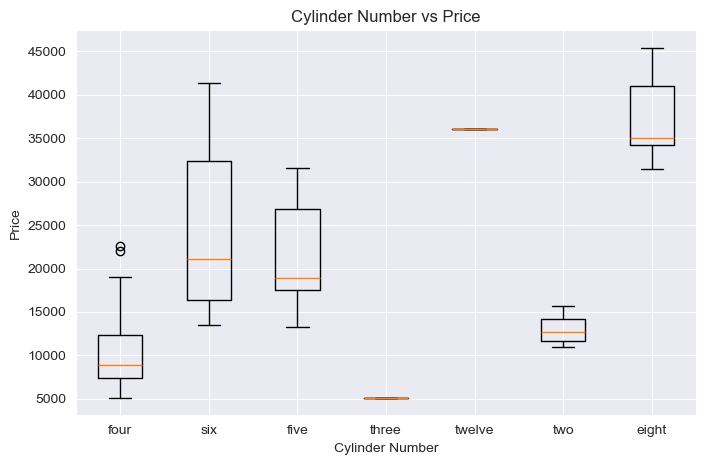

In [56]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cylinderNumber = cars_df["cylindernumber"]
values4, counts4 = np.unique(cylinderNumber, return_counts=True)
plt.bar(values4, counts4)
plt.xlabel("Cylinder Number")
plt.ylabel("Count")
plt.title("Cylinder Number Count")
uniqueCylinderNumber = cylinderNumber.unique()
result2 = []
for y in uniqueCylinderNumber:
    value2 = price[cylinderNumber == y]
    result2.append(value2)
plt.figure()
plt.boxplot(result2, labels=uniqueCylinderNumber)
plt.xlabel("Cylinder Number")
plt.ylabel("Price")
plt.title("Cylinder Number vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
4 cylinders seem to take up most of the marketshape mainly due to the fact that most cars use the I4 engine. The higher the cylinder count the higher the price due to the fact high cylinders can make more power. Interestingly enough, the 2 cylinder vehicles are more generally more expensive mostly due to motorcycles using 2 cylinder engines. Motorcycles are more of a luxury commodity compared to the average I4 vehicle.

3.6 Create the following plots

    1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
    2. A box plot of fuelsystem on the x-axis and price on the y-axis.

[5 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\2650749474.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result3, labels=uniqueFuelSystem)


Text(0.5, 1.0, 'Fuel System vs Price')

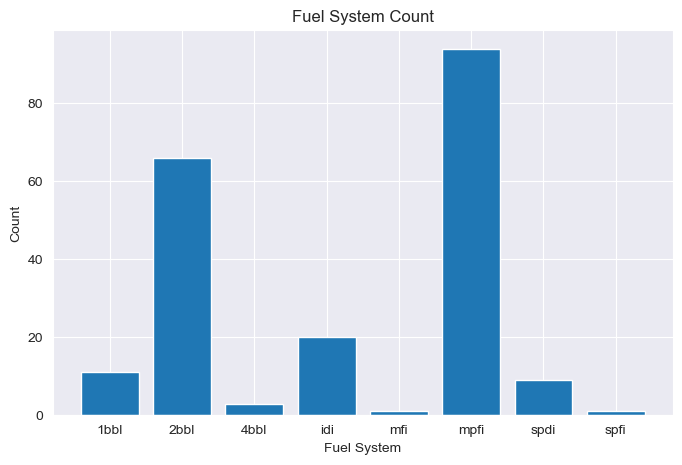

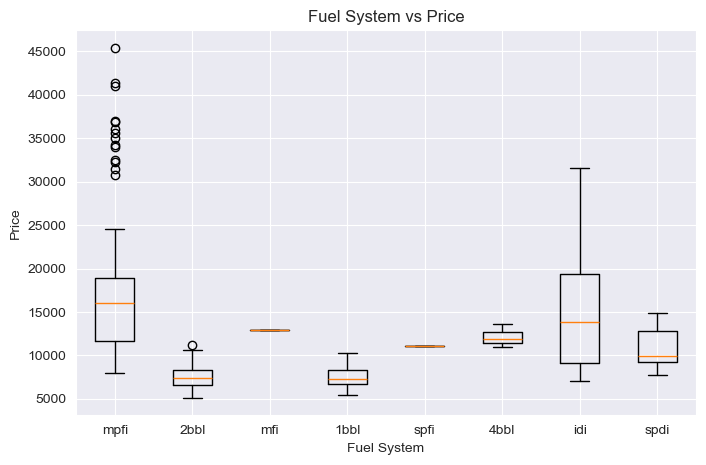

In [57]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fuelSystem = cars_df["fuelsystem"]
values5, counts5 = np.unique(fuelSystem, return_counts=True)
plt.bar(values5, counts5)
plt.xlabel("Fuel System")
plt.ylabel("Count")
plt.title("Fuel System Count")
uniqueFuelSystem = fuelSystem.unique()
result3 = []
for y in uniqueFuelSystem:
    value3 = price[fuelSystem == y]
    result3.append(value3)
plt.figure()
plt.boxplot(result3, labels=uniqueFuelSystem)
plt.xlabel("Fuel System")
plt.ylabel("Price")
plt.title("Fuel System vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
The mpfi system is the most used system with the biggest price range.

3.7 Create the following plots

    1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
    2. A box plot of drivewheel on the x-axis and price on the y-axis.

[5 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\3888077575.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result4, labels=uniqueDriveWheel)


Text(0.5, 1.0, 'Drivewheel vs Price')

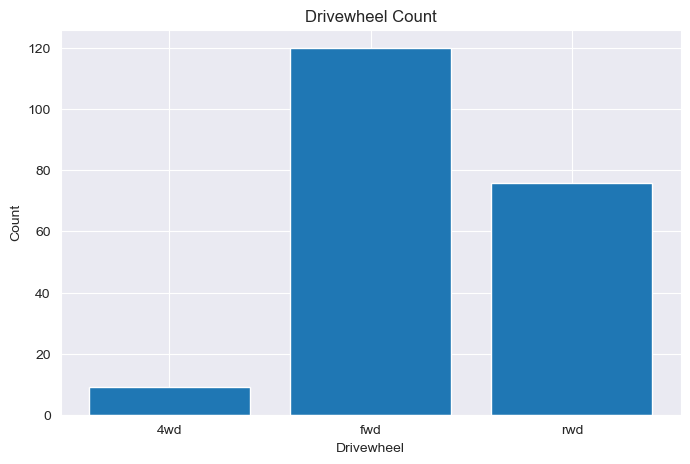

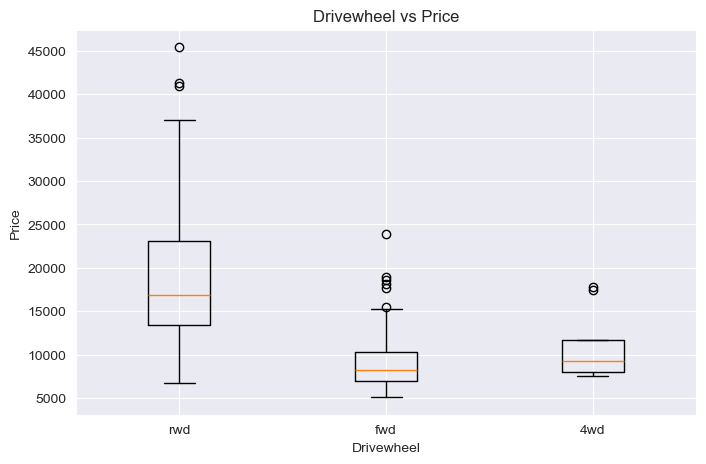

In [58]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
driveWheel = cars_df["drivewheel"]
values6, counts6 = np.unique(driveWheel, return_counts=True)
plt.bar(values6, counts6)
plt.xlabel("Drivewheel")
plt.ylabel("Count")
plt.title("Drivewheel Count")
uniqueDriveWheel = driveWheel.unique()
result4 = []
for z in uniqueDriveWheel:
    value4 = price[driveWheel == z]
    result4.append(value4)
plt.figure()
plt.boxplot(result4, labels=uniqueDriveWheel)
plt.xlabel("Drivewheel")
plt.ylabel("Price")
plt.title("Drivewheel vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
FWD cars take most of the market because most economy cars use FWD. RWD drive cars have top market share due to many high end cars using RWD.

3.8 Create the following plots

    1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginelocation on the x-axis and price on the y-axis.

[5 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\3127463396.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result5, labels=uniqueEngineLocation)


Text(0.5, 1.0, 'Engine Location vs Price')

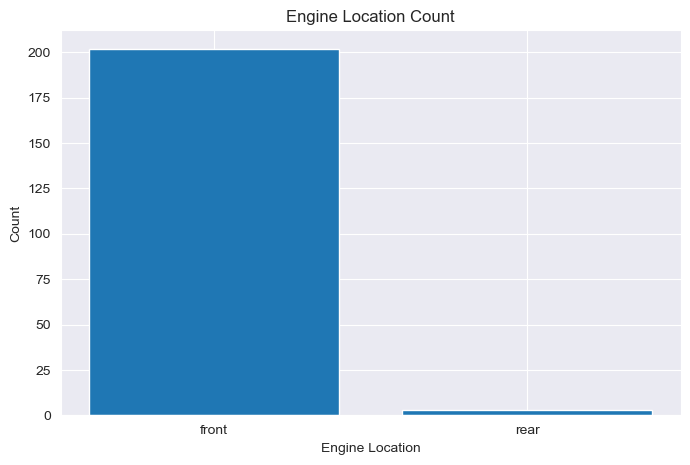

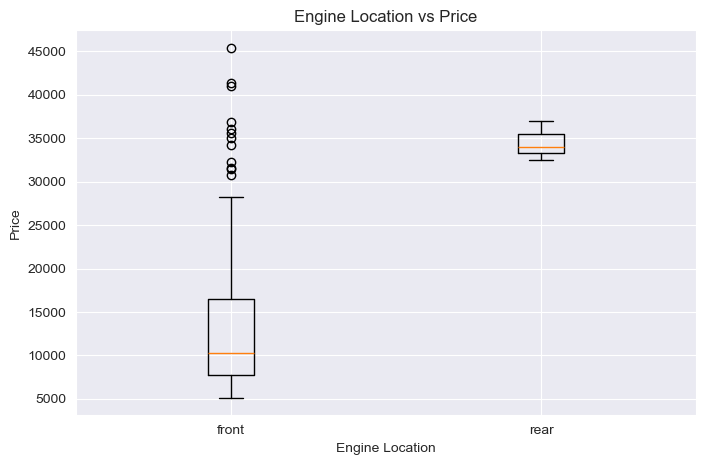

In [59]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
engineLocation = cars_df["enginelocation"]
values7, counts7 = np.unique(engineLocation, return_counts=True)
plt.bar(values7, counts7)
plt.xlabel("Engine Location")
plt.ylabel("Count")
plt.title("Engine Location Count")
uniqueEngineLocation = engineLocation.unique()
result5 = []
for a in uniqueEngineLocation:
    value5 = price[engineLocation == a]
    result5.append(value5)
plt.figure()
plt.boxplot(result5, labels=uniqueEngineLocation)
plt.xlabel("Engine Location")
plt.ylabel("Price")
plt.title("Engine Location vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Front engines take up most the marketshare and even higher end markets because rear engines are extremely contraversial.

3.9 Create the following plots

    1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
    2. A box plot of fueltype on the x-axis and price on the y-axis.

[5 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\1019890919.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result6, labels=uniqueFuelType)


Text(0.5, 1.0, 'Fuel Type vs Price')

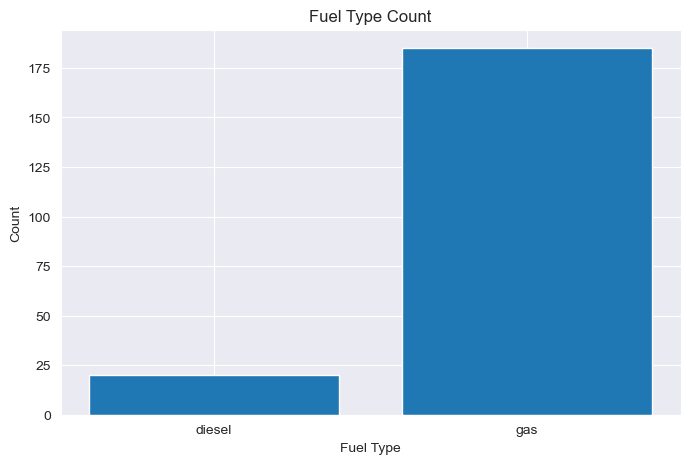

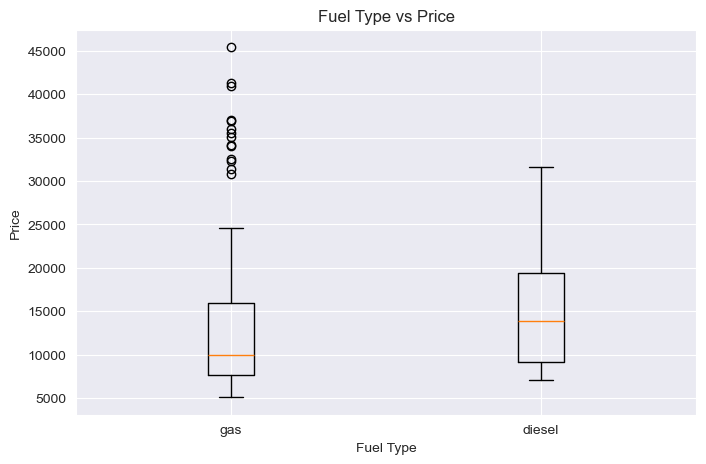

In [60]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fuelType = cars_df["fueltype"]
values8, counts8 = np.unique(fuelType, return_counts=True)
plt.bar(values8, counts8)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Fuel Type Count")
uniqueFuelType = fuelType.unique()
result6 = []
for b in uniqueFuelType:
    value6 = price[fuelType == b]
    result6.append(value6)
plt.figure()
plt.boxplot(result6, labels=uniqueFuelType)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Fuel Type vs Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Gas cars will obviously be most of the marketshare as trucks only use diesel. Gas cars are genrally cheaper than diesel but high end diesel cars cannot compete with high end gas cars.

3.10 Create the following plots

    1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of doornumber on the x-axis and price on the y-axis.

[5 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\205196964.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result7, labels=uniqueDoorNumber)


Text(0.5, 1.0, 'Number of Doors vs. Price')

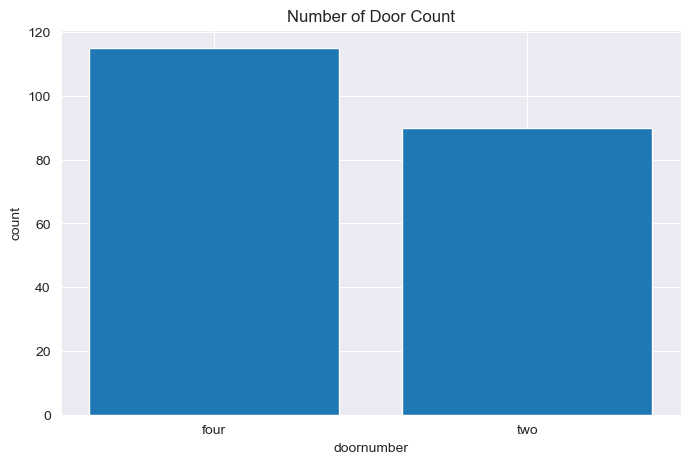

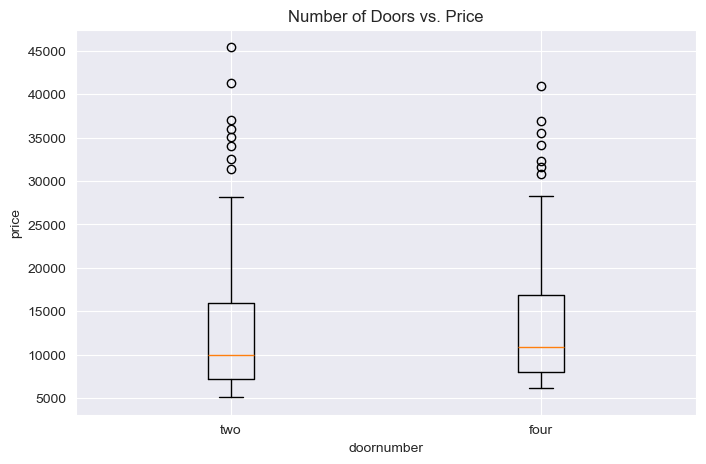

In [61]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
doorNumber = cars_df["doornumber"]
values9, counts9 = np.unique(doorNumber, return_counts=True)
plt.bar(values9, counts9)
plt.xlabel("doornumber")
plt.ylabel("count")
plt.title("Number of Door Count")
uniqueDoorNumber = doorNumber.unique()
result7 = []
for c in uniqueDoorNumber:
    value7 = price[doorNumber == c]
    result7.append(value7)
plt.figure()
plt.boxplot(result7, labels=uniqueDoorNumber)
plt.xlabel("doornumber")
plt.ylabel("price")
plt.title("Number of Doors vs. Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
2 door cars take a surprisingly high amount of marketshare. Another surprising thing is that 2 door cars are generally cheaper than 4 door even though high end cars are more likely to use 2 door

3.11 Create the following plots

    1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
    2. A box plot of aspiration on the x-axis and price on the y-axis.

[5 Points]

C:\Users\legen\AppData\Local\Temp\ipykernel_30032\2048632850.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result8, labels=uniqueAspiration)


Text(0.5, 1.0, 'Aspiration vs. Price')

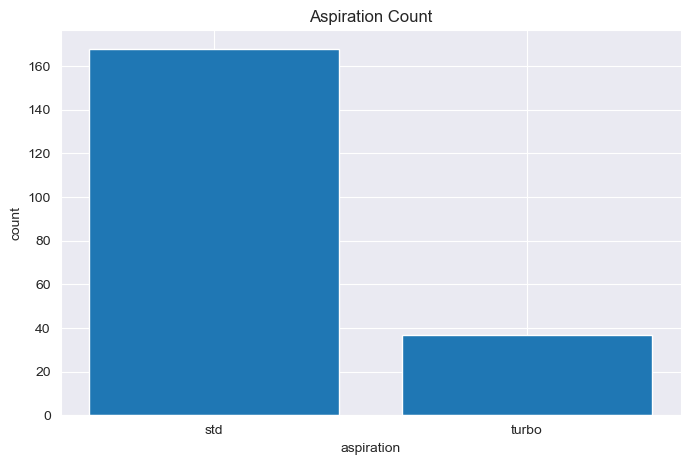

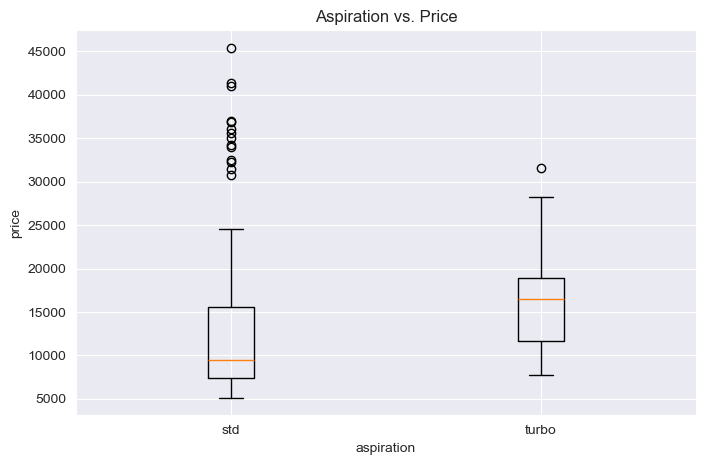

In [62]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
aspiration = cars_df["aspiration"]
values10, counts10 = np.unique(aspiration, return_counts=True)
plt.bar(values10, counts10)
plt.xlabel("aspiration")
plt.ylabel("count")
plt.title("Aspiration Count")
uniqueAspiration = aspiration.unique()
result8 = []
for d in uniqueAspiration:
    value8 = price[aspiration == d]
    result8.append(value8)
plt.figure()
plt.boxplot(result8, labels=uniqueAspiration)
plt.xlabel("aspiration")
plt.ylabel("price")
plt.title("Aspiration vs. Price")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Naturally aspirated is commmonly used due to it being in economy cars. Turbocharged is more of a luxury commodity which is why the price range is more towards the high prices.

## Part 4: Visualizing Numerical Data

### [15 Points]

    price
    carlength
    carwidth
    carheight
    curbweight
    enginesize
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    wheelbase
    citympg
    highwaympg

4.1 Create the following plots

    1. A plot showing the price distribution
    2. A box plot of price

[3 Points]

Text(0.5, 1.0, 'Car Price Spread')

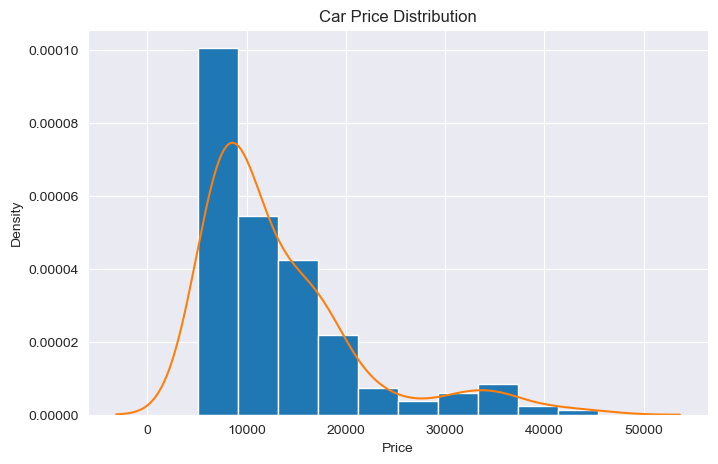

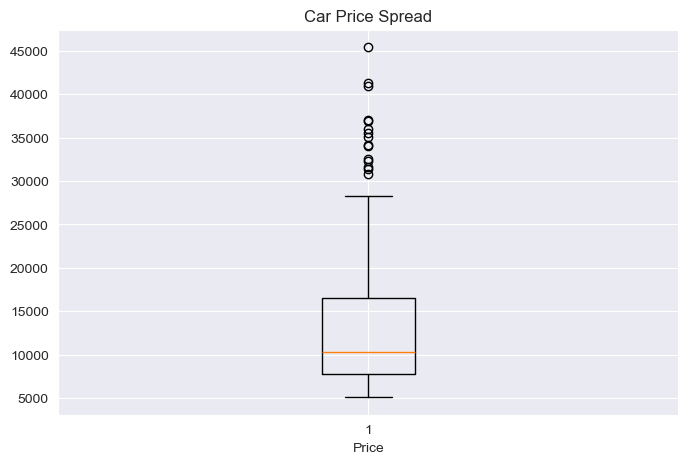

In [63]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
plt.hist(price, density=True)
sns.kdeplot(price)
plt.xlabel("Price")
plt.title("Car Price Distribution")
plt.figure()
plt.boxplot(price)
plt.xlabel("Price")
plt.title("Car Price Spread")

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Cheaper cars are more common.

Let's try and get an idea of how the car attributes related to a car's size are related to price.

4.2 Create the following plots

    1. A scatter plot of carlength vs price.
    2. A scatter plot of carwidth vs price.
    3. A scatter plot of carheight vs price.
    4. A scatter plot of carweight vs price.

[3 Points]

Text(0.5, 1.0, 'Car Weight vs Price')

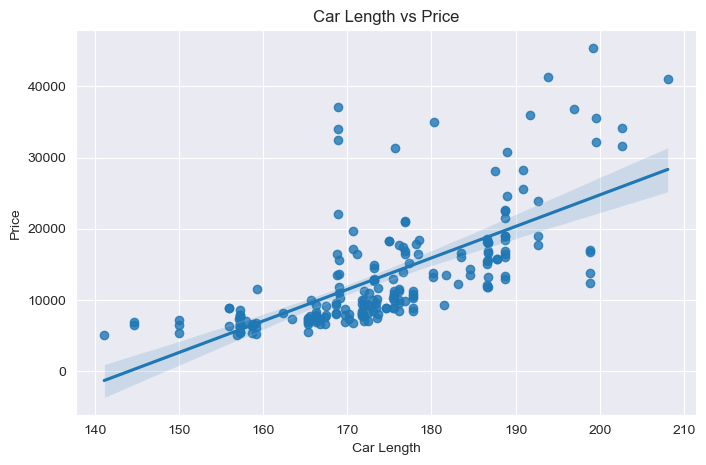

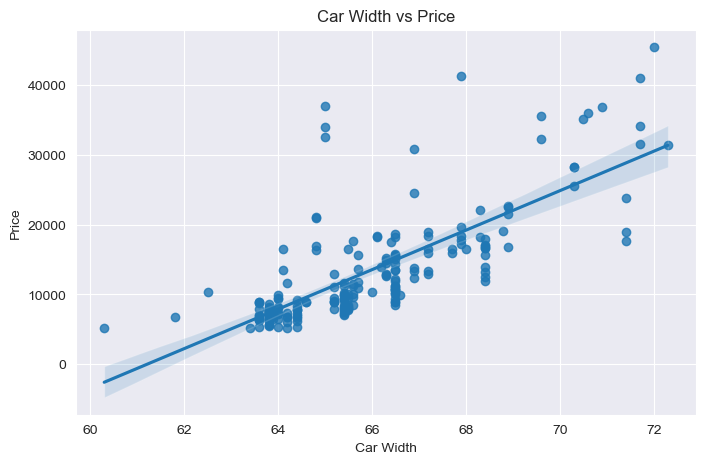

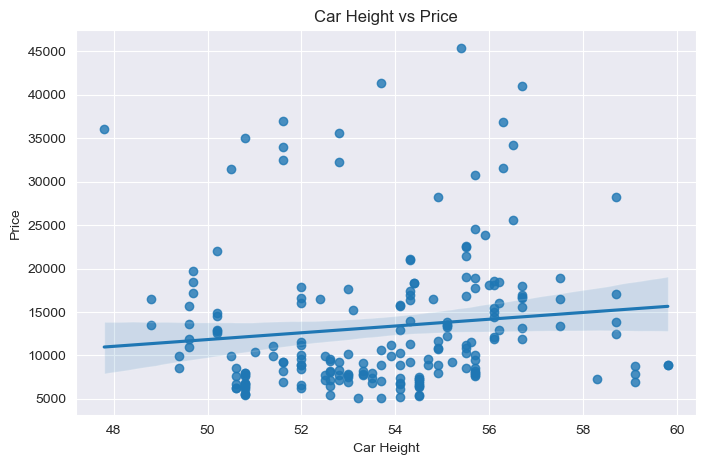

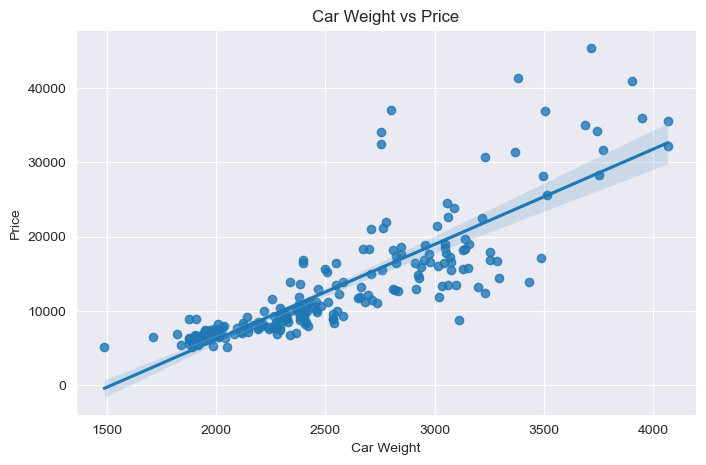

In [64]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
carLength = cars_df["carlength"]
carWidth = cars_df["carwidth"]
carHeight = cars_df["carheight"]
carWeight = cars_df["curbweight"]
sns.regplot(x=carLength, y=price)
plt.xlabel("Car Length")
plt.ylabel("Price")
plt.title("Car Length vs Price")
plt.figure()
sns.regplot(x=carWidth, y=price)
plt.xlabel("Car Width")
plt.ylabel("Price")
plt.title("Car Width vs Price")
plt.figure()
sns.regplot(x=carHeight, y=price)
plt.xlabel("Car Height")
plt.ylabel("Price")
plt.title("Car Height vs Price")
plt.figure()
sns.regplot(x=carWeight, y=price)
plt.xlabel("Car Weight")
plt.ylabel("Price")
plt.title("Car Weight vs Price")

After creating the 4 plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Price goes up with weight, width, and length as bigger cars tend to be more expensive.

4.3 Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

    1. A scatter plot of enginesize vs price.
    2. A scatter plot of boreratio vs price.
    3. A scatter plot of stroke vs price.
    4. A scatter plot of compressionratio vs price.
    5. A scatter plot of horsepower vs price.
    6. A scatter plot of peakrpm vs price.
    7. A scatter plot of wheelbase vs price.
    8. A scatter plot of citympg vs price.
    9. A scatter plot of highwaympg vs price.

[3 Points]

Text(0.5, 1.0, 'Highway MPG vs Price')

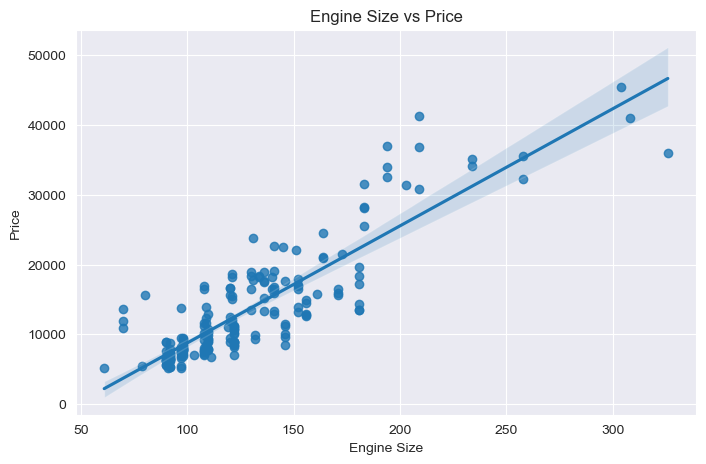

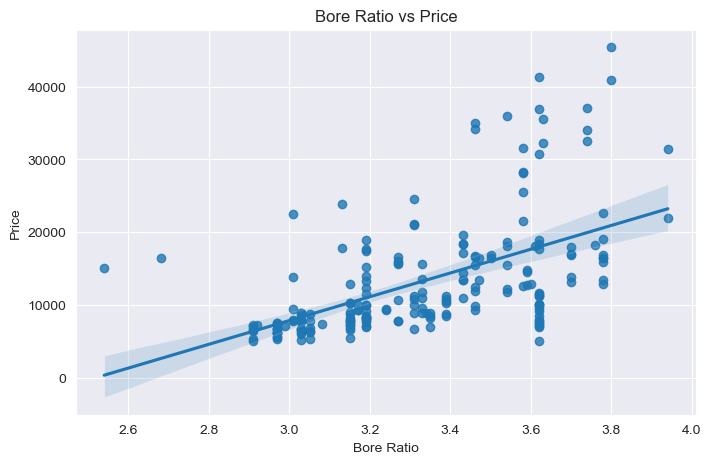

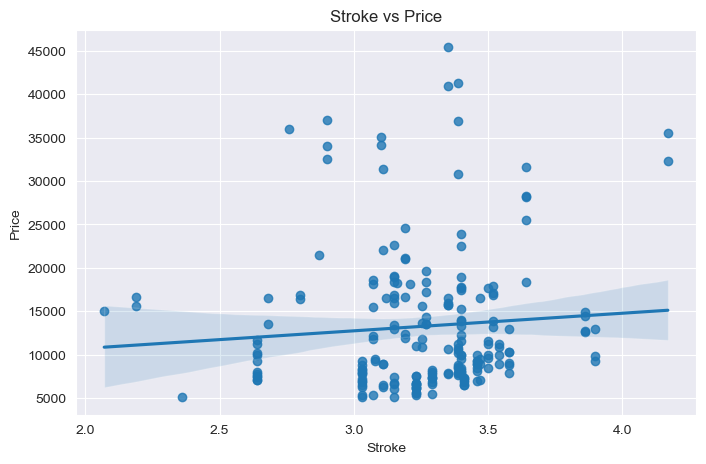

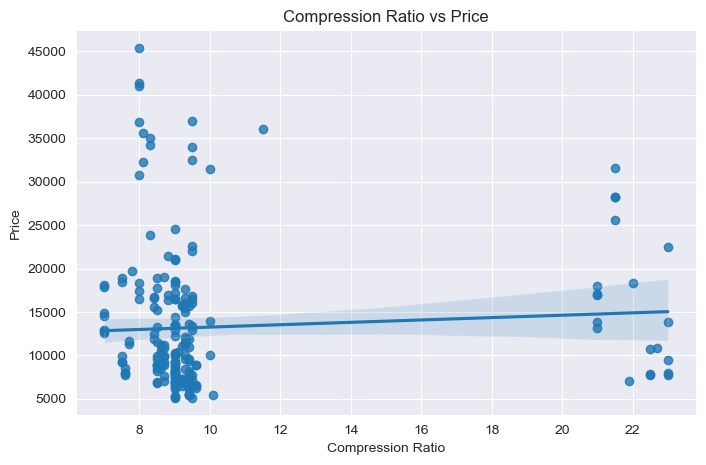

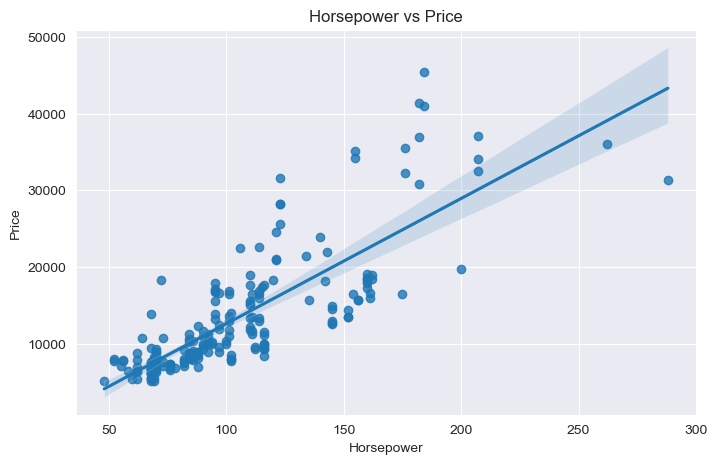

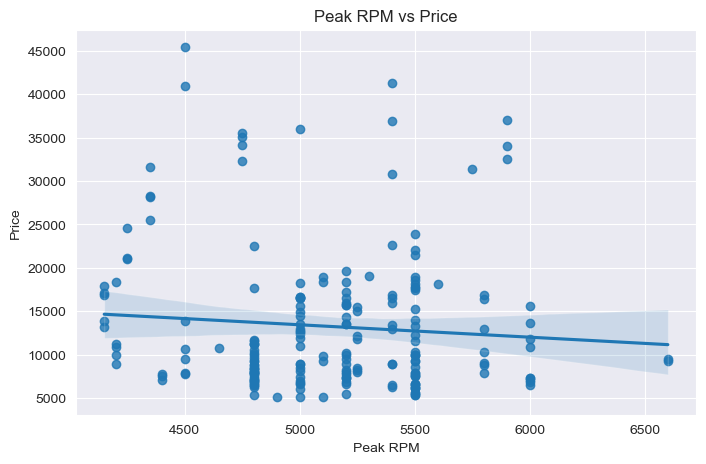

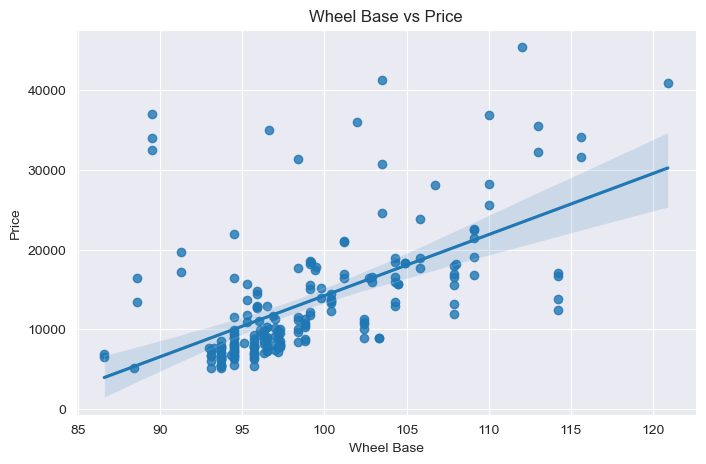

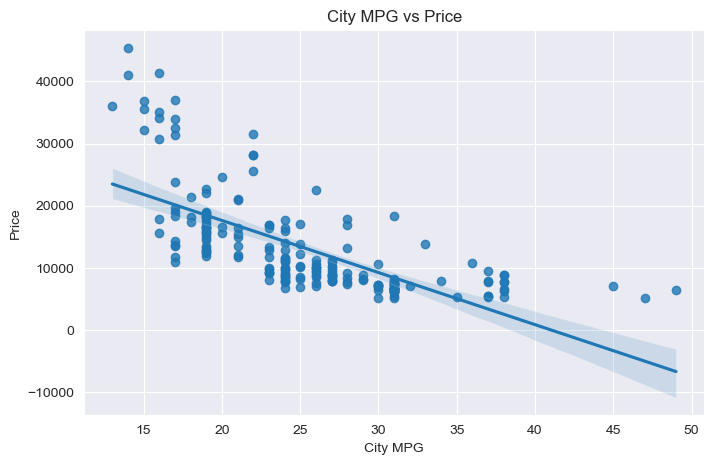

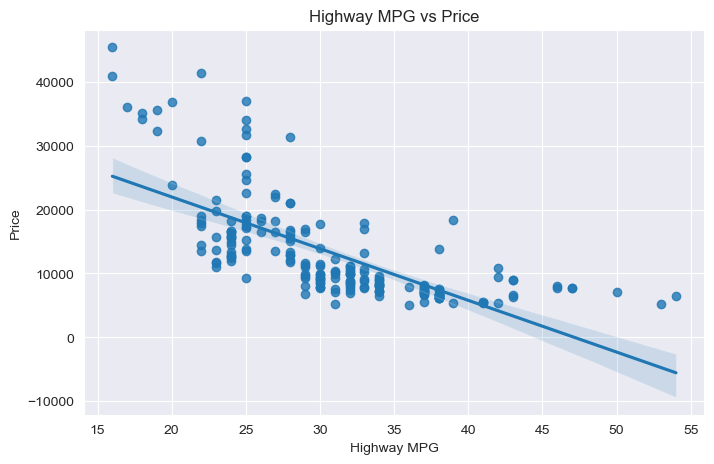

In [65]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
engineSize = cars_df["enginesize"]
boreRatio = cars_df["boreratio"]
stroke = cars_df["stroke"]
compressionRatio = cars_df["compressionratio"]
horsepower = cars_df["horsepower"]
peakRPM = cars_df["peakrpm"]
wheelBase = cars_df["wheelbase"]
cityMPG = cars_df["citympg"]
highwayMPG = cars_df["highwaympg"]
sns.regplot(x=engineSize, y=price)
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.figure()
sns.regplot(x=boreRatio, y=price)
plt.xlabel("Bore Ratio")
plt.ylabel("Price")
plt.title("Bore Ratio vs Price")
plt.figure()
sns.regplot(x=stroke, y=price)
plt.xlabel("Stroke")
plt.ylabel("Price")
plt.title("Stroke vs Price")
plt.figure()
sns.regplot(x=compressionRatio, y=price)
plt.xlabel("Compression Ratio")
plt.ylabel("Price")
plt.title("Compression Ratio vs Price")
plt.figure()
sns.regplot(x=horsepower, y=price)
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")
plt.figure()
sns.regplot(x=peakRPM, y=price)
plt.xlabel("Peak RPM")
plt.ylabel("Price")
plt.title("Peak RPM vs Price")
plt.figure()
sns.regplot(x=wheelBase, y=price)
plt.xlabel("Wheel Base")
plt.ylabel("Price")
plt.title("Wheel Base vs Price")
plt.figure()
sns.regplot(x=cityMPG, y=price)
plt.xlabel("City MPG")
plt.ylabel("Price")
plt.title("City MPG vs Price")
plt.figure()
sns.regplot(x=highwayMPG, y=price)
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.title("Highway MPG vs Price")

After creating the plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
We can see that various factors can affect price and some of them relating to each other. For example high power cars are naturally going to be more expensive. High power cars generally use more gas with is why the lower the MPG is the higher the price is. 

4.4 Create a heatmap or correlation matrix to inspect the correlations in our dataset.

[3 Points]

<Axes: >

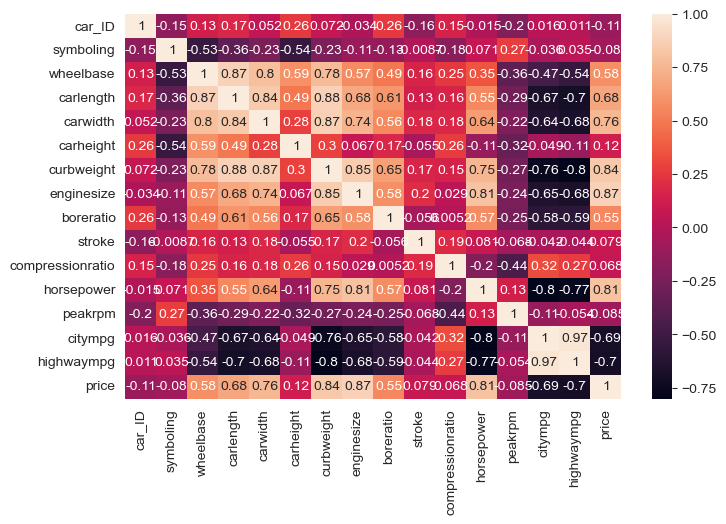

In [72]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
sns.heatmap(cars_df.select_dtypes(include=np.number).corr(), annot=True)

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### TYPE YOUR ANSWER HERE
The MPGs have an extremely strong correlation.

4.5 For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.


<Axes: >

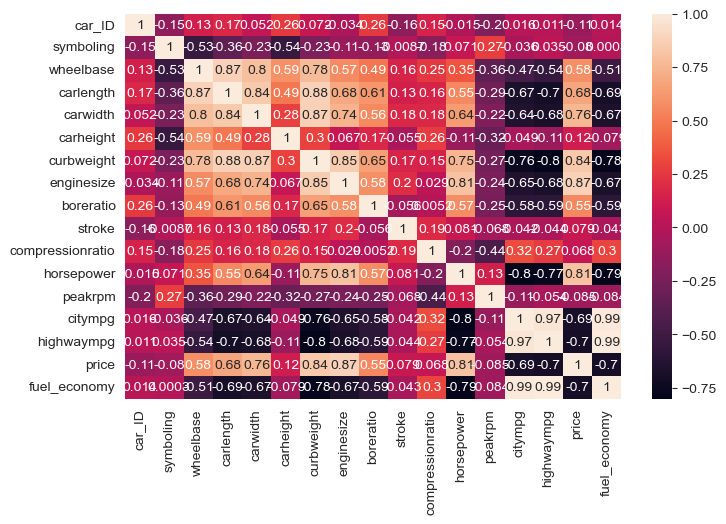

In [73]:
### WRITE YOUR CODE HERE ###
fuel_economy = (cars_df["citympg"] + cars_df["highwaympg"]) / 2
cars_df["fuel_economy"] = fuel_economy
sns.heatmap(cars_df.select_dtypes(include=np.number).corr(), annot=True)

After visual analysis, which variables do you believe to be significant when predicting price, and why?

[3 Points]

### TYPE YOUR ANSWER HERE
Engine size because it has the largest coefficient.

## Part 5: Data Pre-Processing

### [5 Points]

Perform the following

    1. Convert your categorical variables into dummy variables
    2. Scale the data using a scaler of your choice
    3. Split your data into a training and testing set, with test size of 0.30



In [ ]:
### WRITE YOUR CODE HERE ###

## Part 6: Model Creation and Evaluation

### [15 Points]

Perform the following using sklearn

    1. Create a linear regression model, and train (fit) it on the training data.
    2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
    4. Create a scatter plot of the true price labels vs the predicted price value of your model.
    5. Create a histogram of the residuals
    6. Print the $R^2$ of your model

_Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values._

[8 Points]

In [ ]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

[7 Points]

In [ ]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

What do __your__ coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### TYPE YOUR CONCLUSION HERE